Importing relevant libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Load data

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# how big is our train and test data
x_test.shape

(10000, 28, 28)

In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
# one instance

x_train_full[0]
# output gives one instance have 28 values or lengths of arrays and all of these arrrys have 28 numbers in them and

# each of the image pixels have a values go from 0 to 255 

# higher the number wider the pixel or image becomes whiter

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

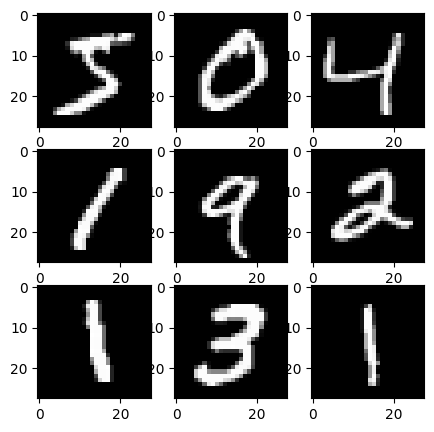

In [7]:
# creating the figure and showing the nine images
# its a easy task to figure out the numbers but we need to build neural networks to identify those numbers

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5,5))
a = 0

for row in range(3):
    for col in range(3):
        axes[row,col].imshow(x_train_full[a], cmap=plt.get_cmap('gray'))
        a += 1
        
plt.show()

Normalize the values

In [8]:
# put all the inputs zero to one:
# just divide all values by 255
# and all value become between 0 to 1
# we are doing validation only for training datasets. for this creating validation dataset directly from data side which is
# import from keras is at training and testing dataset.
# the first 5000 validation datasets, put it aside and divide by 255
# we dont need to divide by 255 to y train values because they only goes from 0 to 9
# and we do the same thing with the test dataset becuase we need to lookm them same

x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [9]:
# check validation of one instance

x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Define classes

In [11]:
# define class name to all the values with string values goes from 0 to 9

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [12]:
class_names[y_train[0]]

'7'

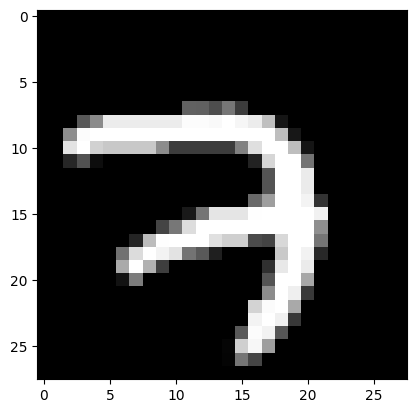

In [13]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

Build neural net

In [14]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# sigmoid: probalities produced by a sigmoid are independent
# softmax: outputs are interrelated. Sum of all outputs are 1

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
x_train.shape

(55000, 28, 28)

Fit the model

In [18]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6047 - accuracy: 0.8437 - val_loss: 0.3003 - val_accuracy: 0.9138
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2839 - accuracy: 0.9185 - val_loss: 0.2345 - val_accuracy: 0.9338
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9334 - val_loss: 0.2024 - val_accuracy: 0.9440
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1993 - accuracy: 0.9433 - val_loss: 0.1817 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1749 - accuracy: 0.9494 - val_loss: 0.1599 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1551 - accuracy: 0.9556 - val_loss: 0.1450 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1393 - accuracy: 0.9603 - val_loss: 0.1349 - val_accuracy:

Performance Evaluation

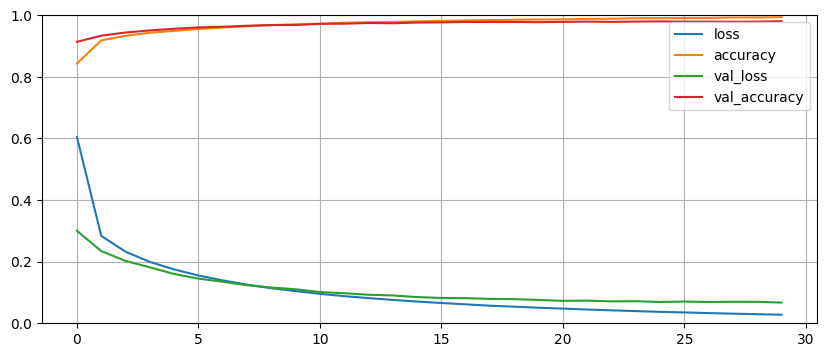

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9791


[0.06789305061101913, 0.9790999889373779]

Prediction for test set

In [21]:
model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


array([[7.71984048e-07, 1.26593065e-07, 1.19910555e-05, ...,
        9.99899626e-01, 1.34722001e-07, 3.51098652e-06],
       [4.41620983e-07, 9.24509732e-05, 9.99876618e-01, ...,
        7.49390758e-11, 1.16909951e-05, 4.92335686e-12],
       [6.87256943e-06, 9.96155798e-01, 3.54418793e-04, ...,
        1.12785562e-03, 1.79941941e-03, 5.57854510e-05],
       ...,
       [7.89298349e-10, 1.92435623e-10, 3.59790286e-09, ...,
        3.38412319e-05, 6.48877517e-07, 5.26539816e-06],
       [1.57170632e-09, 4.19702245e-10, 3.45082123e-11, ...,
        4.21153459e-11, 1.35534674e-05, 4.30610159e-10],
       [8.81699549e-08, 4.73348062e-11, 3.42059394e-08, ...,
        1.09941212e-12, 1.04771685e-08, 1.21570479e-11]], dtype=float32)

In [22]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Confusion Matrix

In [26]:
cm = tf.math.confusion_matrix(y_test, y_classes)

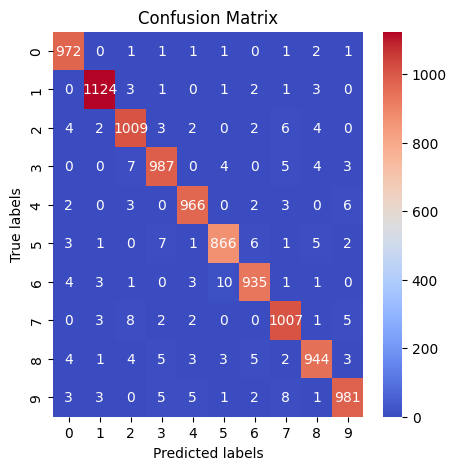

In [32]:
import seaborn as sns

fig = sns.heatmap(cm,
                 annot=True,
                  fmt = 'g',
                 cmap='coolwarm')

#annot =  True to annotate cells
#fmt = string formatting code to use when adding annotation

#labels,title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(5,5)

plt.show()